###  sampling based techniques to deal with unequal misclassification costs and unbalanced data


In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import os
import plotly
import plotly.graph_objs as go
%matplotlib nbagg
os.chdir(r"D:\DS_challenges\Btp-1")

In [2]:
df=pd.read_csv("breast_cancer_data.csv")

In [3]:
#handling categorical data: converting 'diagnosis' column into binumeric(m:1,B:0)
df['diagnosis'] = df['diagnosis'].astype('category')  #changing type of col diagnosis as category
df['diagnosis']=df['diagnosis'].cat.codes    #to convert a Categorical column to its numerical codes

In [4]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_mean'] = rob_scaler.fit_transform(df['area_mean'].values.reshape(-1,1))
df['scaled_area_worst'] = rob_scaler.fit_transform(df['area_worst'].values.reshape(-1,1))
df.drop(['area_mean','area_worst'], axis=1, inplace=True)

<IPython.core.display.Javascript object>


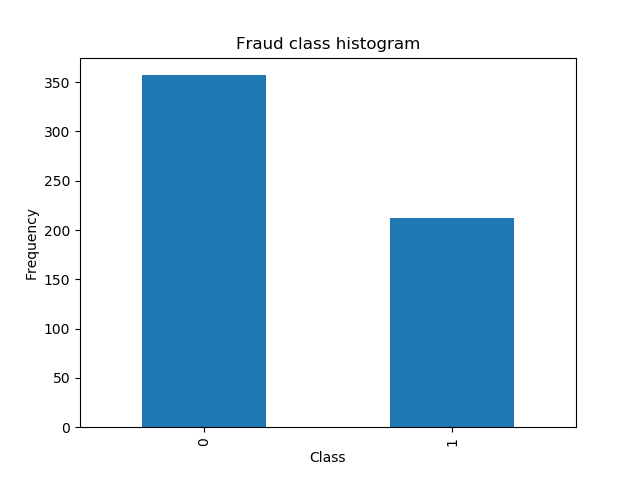

Text(0, 0.5, 'Frequency')

In [5]:
#count of no of no of entries of each label (m:1,B:0)
#B=357(62.7%),M=212(37.3),total=569
%matplotlib nbagg
count_classes = pd.value_counts(df['diagnosis'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
#making highly unbalanced dataset
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['diagnosis'] == 1][:30]
non_fraud_df = df.loc[df['diagnosis'] == 0]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,scaled_mean,scaled_area_worst
311,89382601,0,14.61,15.69,92.68,0.07618,0.03515,0.01447,0.01877,0.1632,...,21.75,103.70,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0.314018,0.271321
500,914862,0,15.04,16.74,98.73,0.09883,0.13640,0.07721,0.06142,0.1668,...,20.43,109.70,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549,0.381623,0.299631
136,868223,0,11.71,16.67,74.72,0.10510,0.06095,0.03592,0.02600,0.1339,...,25.48,86.16,0.1271,0.10280,0.10460,0.06968,0.1712,0.07343,-0.351821,-0.245824
251,88518501,0,11.50,18.45,73.28,0.09345,0.05991,0.02638,0.02069,0.1834,...,22.46,83.12,0.1183,0.10490,0.08105,0.06544,0.2740,0.06487,-0.396523,-0.312291
380,901549,0,11.27,12.96,73.16,0.12370,0.11110,0.07900,0.05550,0.2018,...,20.53,84.93,0.1610,0.24290,0.22470,0.13180,0.3343,0.09215,-0.454746,-0.369967


<IPython.core.display.Javascript object>


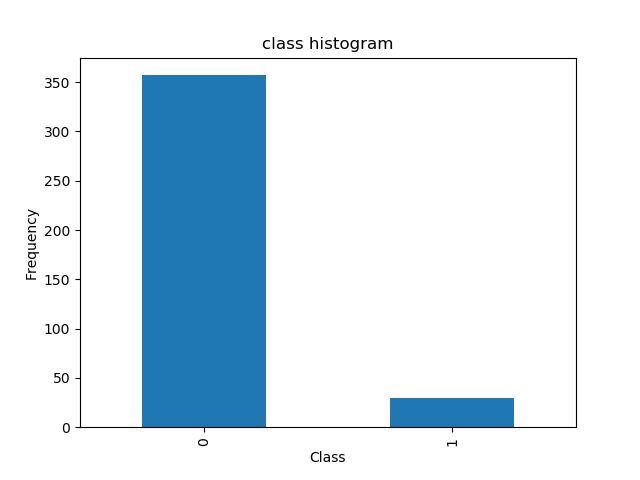

Text(0, 0.5, 'Frequency')

In [6]:
#making highly unbalanced dataset
#count of no of no of entries of each label (m:1,B:0)
#B=357(92.3%),M=30(7.7%),total=569
%matplotlib nbagg
count_classes = pd.value_counts(new_df['diagnosis'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
df1 =new_df[df.columns[2:]]
y1=new_df['diagnosis']

<IPython.core.display.Javascript object>


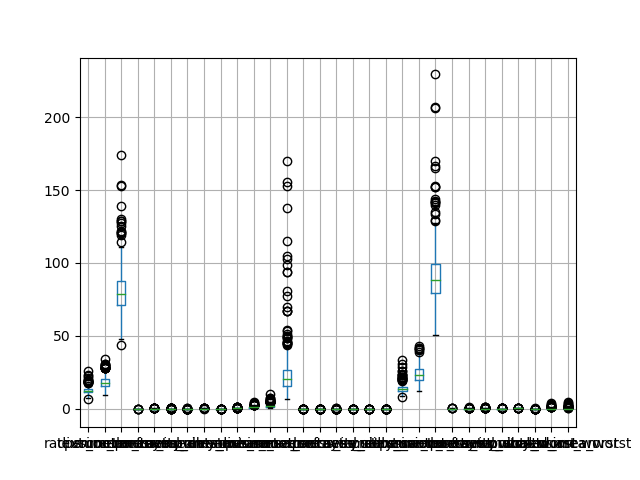

In [10]:
#creating boxplot for all variable. we use by parameter in boxplot to plot boxplot w.r.t target var
plt.figure();
bp = df1.boxplot()

<IPython.core.display.Javascript object>


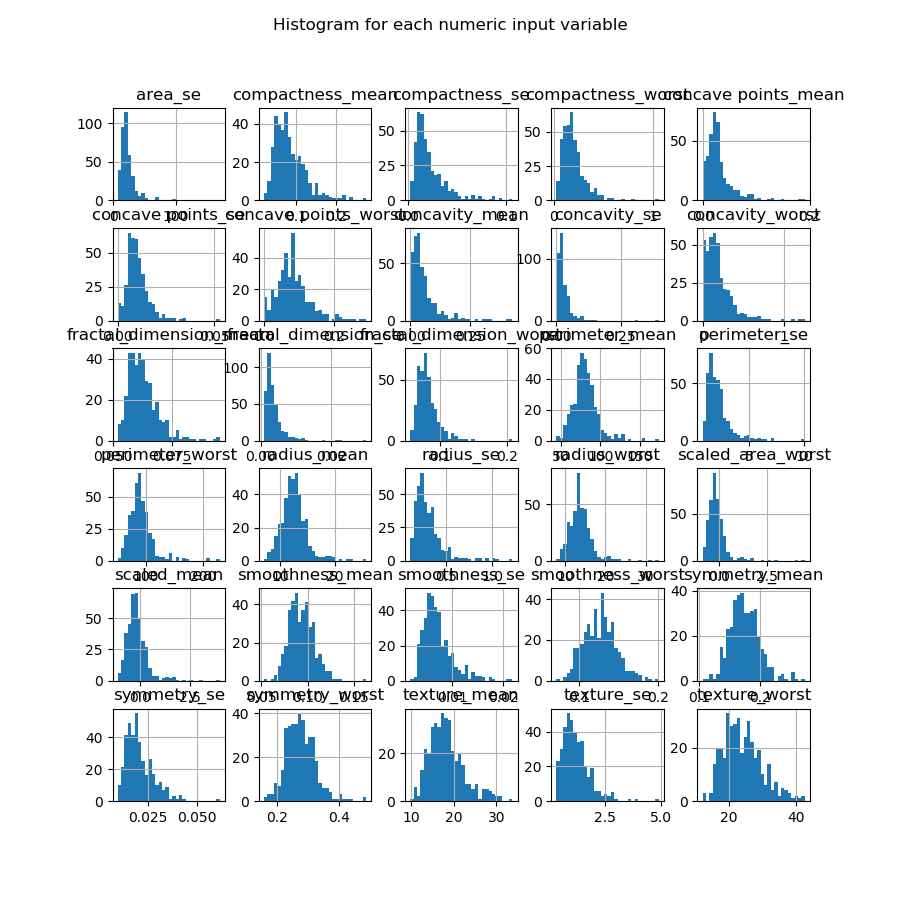

In [11]:
#plotting histogram for each feature
import pylab as pl
df1.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

In [8]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.022077,-0.164525,0.077203,0.801900,-0.005165,0.025172,0.010140,0.008312,-0.015075,-0.003572
std,0.969711,1.141335,0.155830,0.849649,1.006076,1.347114,0.990481,0.996974,0.991135,1.006878
min,-3.169979,-3.823780,-0.345188,-4.400947,-3.069100,-3.437273,-4.446632,-3.597163,-3.694285,-3.267244
25%,-0.596279,-1.024277,-0.031261,0.601625,-0.699650,-1.019402,-0.647498,-0.665773,-0.638925,-0.686904
50%,0.020672,0.070749,0.066640,0.967323,-0.020359,-0.133819,0.007804,-0.000857,-0.012803,0.003007
75%,0.662369,0.738877,0.181573,1.171327,0.678223,1.014279,0.668862,0.677693,0.632689,0.675788
max,3.636102,3.736712,0.626920,3.677792,3.831790,4.291437,3.412069,3.468383,3.491550,3.598310


# parameter tuning for different algorithms

In [12]:
#creating training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( df1, y1, test_size=0.3, random_state=42)

## 1.svm

In [13]:
#finding best parameters through grid search for svm
#Create a dictionary of possible parameters
params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear','rbf'] }
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Create the GridSearchCV object
grid_clf = GridSearchCV(SVC(class_weight='balanced'), params_grid)

#Fit the data with the best possible parameters
grid_clf = grid_clf.fit(x_train, y_train)

#Print the best estimator with it's parameters
print(grid_clf.best_estimator_,grid_clf.best_params_)

C:\anaconda-installation\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}


C:\anaconda-installation\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



## 2.KNN

<IPython.core.display.Javascript object>


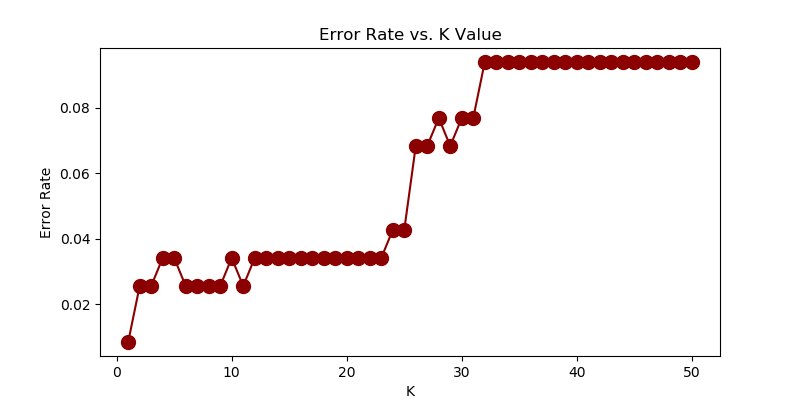

Text(0, 0.5, 'Error Rate')

In [15]:
#determining value of k
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# we select k=15 since error rate increases after that

## 4.Random Forest

<IPython.core.display.Javascript object>


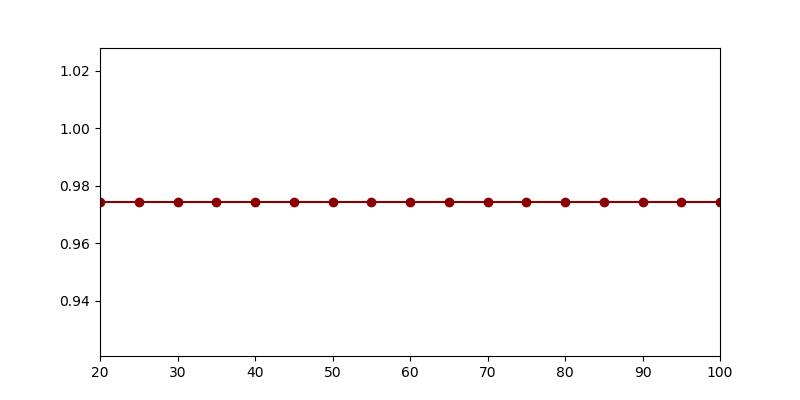

In [16]:
#determining no of estimator hyperparameter
from sklearn.ensemble import RandomForestClassifier
results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

<IPython.core.display.Javascript object>


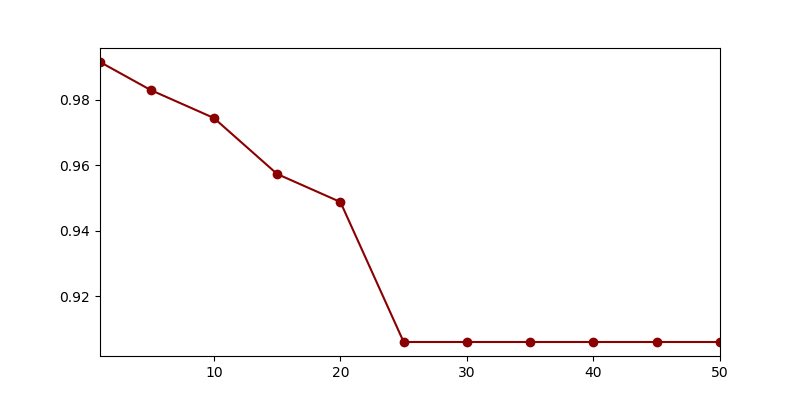

In [17]:
#determining min samples leaf hyper-parameter
results = []
min_samples_leaf_options = [1,5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")
#we select min_sample_leaf=5 since accuracy at that point is max

## function to evaluate different classifier algorithm over X,y

In [8]:
def algo_function(X_rs,y_rs):
    #creating train and test set
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split( X_rs,y_rs, test_size=0.3, random_state=42)
    
    #svm
    from sklearn.svm import SVC
    svm =  SVC(kernel="linear", C=5,random_state=101,gamma= 0.001 )
    svm.fit(x_train, y_train)
    y_pred=svm.predict(x_test)
    #evaluating model with confusion matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    df_table = confusion_matrix(y_test,y_pred)
    print("SVM")
    print('total cost:',df_table[0,1]+df_table[1,0])
    print('confusion matrix for svm:',df_table)
    print('accuracy for svm:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
    print('classification_report for svm \n',classification_report(y_test,y_pred))
    print("\n")
    
    #knn
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    df_table = confusion_matrix(y_test,y_pred)

    print("KNN")
    print('total cost:',df_table[0,1]+df_table[1,0])
    print('confusion matrix for knn:',df_table)
    print('accuracy for knn:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
    print('classification_report for knn \n',classification_report(y_test,y_pred))
    print("\n")
    
    #logistic regression    
    from sklearn.linear_model import LogisticRegression
    lr =  LogisticRegression(solver="lbfgs")
    lr.fit(x_train, y_train)
    y_pred=lr.predict(x_test)
    df_table = confusion_matrix(y_test,y_pred)

    print("Logistic Regression")
    print('total cost:',df_table[0,1]+df_table[1,0])
    print('confusion matrix for Logistic Regression:',df_table)
    print('accuracy for Logistic Regression:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
    print('classification_report for Logistic Regression \n',classification_report(y_test,y_pred))
    print("\n")
        
    #randomforest
    from sklearn.ensemble import RandomForestClassifier
    rfm = RandomForestClassifier(n_estimators=45, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 5)
    rfm.fit(x_train, y_train)
    y_pred=rfm.predict(x_test)
    df_table = confusion_matrix(y_test,y_pred)
    print("RandomForestClassifier")
    print('total cost:',df_table[0,1]+df_table[1,0])
    print('confusion matrix for RandomForestClassifier:',df_table)
    print('accuracy for RandomForestClassifier:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
    print('classification_report for RandomForestClassifier \n',classification_report(y_test,y_pred))
    print("\n")

# function to visualise dataset in 2d-plane

In [9]:
#For ease of visualization, I use principal component analysis or tsne to reduce the dimensions and pick the
# first two principal components. A scatterplot for the dataset is shown below.
def visualize_2d(X,y,algorithm="tsne",title="Data in 2D",figsize=(8,8)):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    if algorithm=="tsne":
        reducer = TSNE(n_components=2,random_state=47,n_iter=400,angle=0.6)
    elif algorithm=="pca":
        reducer = PCA(n_components=2,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    if X.shape[1]>2:
        X = reducer.fit_transform(X)
    else:
        if type(X)==pd.DataFrame:
            X=X.values
    f, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=figsize)
    sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
    ax1.set_title(title);
    plt.show();

<IPython.core.display.Javascript object>


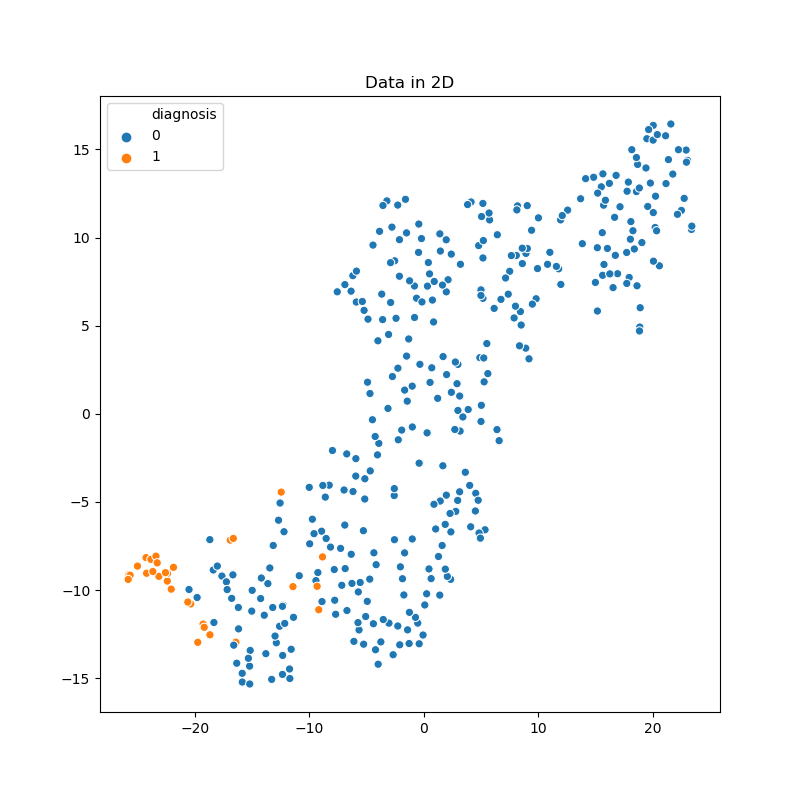

In [20]:
visualize_2d(df1, y1)

# result of diiferent classification algorithm before sampeling


In [24]:
#result of diffferent classification algorithm before sampling
algo_function(df1,y1)

SVM
total cost: 4
confusion matrix for svm: [[105   1]
 [  3   8]]
accuracy for svm: 0.9658119658119658
classification_report for svm 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.89      0.73      0.80        11

   micro avg       0.97      0.97      0.97       117
   macro avg       0.93      0.86      0.89       117
weighted avg       0.96      0.97      0.96       117



KNN
total cost: 3
confusion matrix for knn: [[106   0]
 [  3   8]]
accuracy for knn: 0.9743589743589743
classification_report for knn 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       106
           1       1.00      0.73      0.84        11

   micro avg       0.97      0.97      0.97       117
   macro avg       0.99      0.86      0.91       117
weighted avg       0.98      0.97      0.97       117



Logistic Regression
total cost: 5
confusion matrix for Logistic Regres

C:\anaconda-installation\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



RandomForestClassifier
total cost: 3
confusion matrix for RandomForestClassifier: [[106   0]
 [  3   8]]
accuracy for RandomForestClassifier: 0.9743589743589743
classification_report for RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       106
           1       1.00      0.73      0.84        11

   micro avg       0.97      0.97      0.97       117
   macro avg       0.99      0.86      0.91       117
weighted avg       0.98      0.97      0.97       117





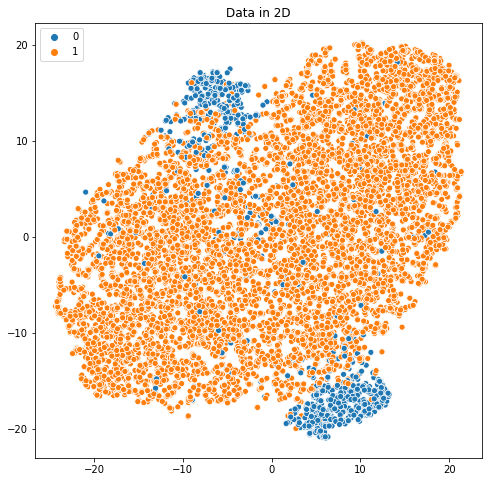

In [13]:
#dataset before sampling
visualize_2d(X,y)

# result of diiferent classification algorithm after over and under sampling


In [10]:
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN,BorderlineSMOTE )
import imblearn
X,y=df1,y1
def samp_function(sampling_method,n_0,n_1):
    #random undersampling using imbalanced learn library
    
    if sampling_method=='rand_under_samp':
        from imblearn.datasets import make_imbalance
        from collections import Counter
        X_rs, y_rs = make_imbalance(df1,y1, ratio={1:n_1, 0:n_0},random_state=0)
        #creating training and test sets
        print('rand_under_samp :')
        algo_function(X_rs,y_rs)
    
    elif sampling_method=='ClusterCentroids':
        sampler = ClusterCentroids(ratio={1:n_1, 0:n_0})
        X_rs, y_rs = sampler.fit_sample(X, y)
        print('ClusterCentroids :')
        algo_function(X_rs,y_rs)
    
    elif sampling_method=='TomekLinks':
        sampler = TomekLinks(ratio={1:n_1, 0:n_0},random_state=0)
        X_rs, y_rs = sampler.fit_sample(X, y)
        print('TomekLinks :')
        algo_function(X_rs,y_rs)
    
    elif sampling_method=='NeighbourhoodCleaningRule':
        sampler = NeighbourhoodCleaningRule(ratio={1:n_1, 0:n_0},random_state=0)
        X_rs, y_rs = sampler.fit_sample(X, y)
        print('NeighbourhoodCleaningRule :')
        algo_function(X_rs,y_rs)
    
    elif sampling_method=='NearMiss':
        sampler = NearMiss(ratio={1:n_1, 0:n_0},random_state=0)
        X_rs, y_rs = sampler.fit_sample(X, y)
        print('NearMiss :')
        algo_function(X_rs,y_rs)
    
    elif sampling_method=='RandomOverSampler':
        from imblearn.over_sampling import (RandomOverSampler,SMOTE, ADASYN)
        sampler = RandomOverSampler(ratio={1:n_1, 0:n_0},random_state=0)#0:27%
        X_rs, y_rs = sampler.fit_sample(X, y)
        print('RandomOverSampler :')
        algo_function(X_rs,y_rs)
        
    elif sampling_method=='SMOTE':
        sampler = imblearn.over_sampling.SMOTE(ratio={1:n_1, 0:n_0},random_state=1)
        X_rs, y_rs = sampler.fit_sample(X, y)
        print('SMOTE :')
        algo_function(X_rs,y_rs)
        
    elif sampling_method=='BorderlineSMOTE':
        sampler = imblearn.over_sampling.BorderlineSMOTE(sampling_strategy=n_1/n_0,random_state=42)
        #ADASYN(ratio={1:n_1, 0:n_0},random_state=1)
        X_rs, y_rs = sampler.fit_sample(X, y)
        print('BorderlineSMOTE :')
        algo_function(X_rs,y_rs)

In [17]:
lis1 = ['rand_under_samp','TomekLinks','NeighbourhoodCleaningRule','NearMiss','ClusterCentroids']
lis2 = ['RandomOverSampler','SMOTE','BorderlineSMOTE']
#list1 for undersampling
#list2 for oversampling
for i in lis2:
    samp_function(i,360,360)
    

C:\anaconda-installation\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning:

After over-sampling, the number of samples (360) in class 1 will be larger than the number of samples in the majority class (class #0 -> 357)

C:\anaconda-installation\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning:

After over-sampling, the number of samples (360) in class 0 will be larger than the number of samples in the majority class (class #0 -> 357)

C:\anaconda-installation\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



RandomOverSampler :
SVM
total cost: 1
confusion matrix for svm: [[118   1]
 [  0  97]]
accuracy for svm: 0.9953703703703703
classification_report for svm 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       119
           1       0.99      1.00      0.99        97

   micro avg       1.00      1.00      1.00       216
   macro avg       0.99      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



KNN
total cost: 1
confusion matrix for knn: [[118   1]
 [  0  97]]
accuracy for knn: 0.9953703703703703
classification_report for knn 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       119
           1       0.99      1.00      0.99        97

   micro avg       1.00      1.00      1.00       216
   macro avg       0.99      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



Logistic Regression
total cost: 0
confusion matrix

C:\anaconda-installation\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning:

After over-sampling, the number of samples (360) in class 1 will be larger than the number of samples in the majority class (class #0 -> 357)

C:\anaconda-installation\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning:

After over-sampling, the number of samples (360) in class 0 will be larger than the number of samples in the majority class (class #0 -> 357)

C:\anaconda-installation\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



RandomForestClassifier
total cost: 4
confusion matrix for RandomForestClassifier: [[116   3]
 [  1  96]]
accuracy for RandomForestClassifier: 0.9814814814814815
classification_report for RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       119
           1       0.97      0.99      0.98        97

   micro avg       0.98      0.98      0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216



BorderlineSMOTE :
SVM
total cost: 1
confusion matrix for svm: [[117   1]
 [  0  97]]
accuracy for svm: 0.9953488372093023
classification_report for svm 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      0.99        97

   micro avg       1.00      1.00      1.00       215
   macro avg       0.99      1.00      1.00       215
weighted avg       1.00      1.00

C:\anaconda-installation\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



RandomForestClassifier
total cost: 5
confusion matrix for RandomForestClassifier: [[116   2]
 [  3  94]]
accuracy for RandomForestClassifier: 0.9767441860465116
classification_report for RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       118
           1       0.98      0.97      0.97        97

   micro avg       0.98      0.98      0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215





## different under-sampling techniques:

### 1) Random under-sampling for the majority class

here technique is to under-sample(removing) the majority class randomly and uniformly. This can potentially lead to loss of information. But if the examples of the majority class are near to others, this method might yield good results.

C:\anaconda-installation\lib\site-packages\imblearn\datasets\_imbalance.py:105: UserWarning:

'ratio' has been deprecated in 0.4 and will be removed in 0.6. Use 'sampling_strategy' instead.



Random undersampling Counter({1: 4000, 0: 1000})


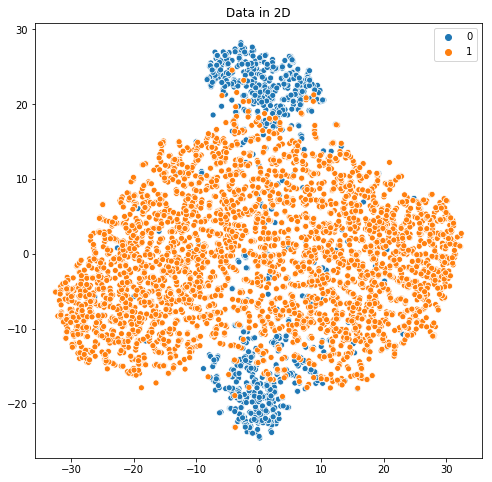

'\nresult1:svm,10%,{1: 4000, 0:1000}\nconfusion matrix:\n [[193  23]\n [  9 775]]\naccuracy: 0.968\nprecision: 0.9711779448621554\nrecall: 0.9885204081632653\nfalsenegrate: 0\nf1 score:  0.979772439949431\n              precision    recall  f1-score   support\n\n           0       0.96      0.89      0.92       216\n           1       0.97      0.99      0.98       784\n\n   micro avg       0.97      0.97      0.97      1000\n   macro avg       0.96      0.94      0.95      1000\nweighted avg       0.97      0.97      0.97      1000\n\n'

In [46]:
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
#random undersampling using imbalanced learn library
from imblearn.datasets import make_imbalance
from collections import Counter
X_rs, y_rs = make_imbalance(df1,y1, ratio={1: 4000, 0:1000},
                      random_state=0)
print('Random undersampling {}'.format(Counter(y_rs)))
visualize_2d(X_rs,y_rs)

'''
result1:svm,10%,{1: 4000, 0:1000}
confusion matrix:
 [[193  23]
 [  9 775]]
accuracy: 0.968
precision: 0.9711779448621554
recall: 0.9885204081632653
falsenegrate: 0
f1 score:  0.979772439949431
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       216
           1       0.97      0.99      0.98       784

   micro avg       0.97      0.97      0.97      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.97      0.97      0.97      1000

'''

## (2) ClusterCentroids

This method undersamples the majority class by replacing a cluster of majority samples This method finds the clusters of majority class with K-mean algorithms. Then it keeps the cluster centroids of the N clusters as the new majority samples.

Cluster centriods undersampling Counter({1: 4000, 0: 1000})


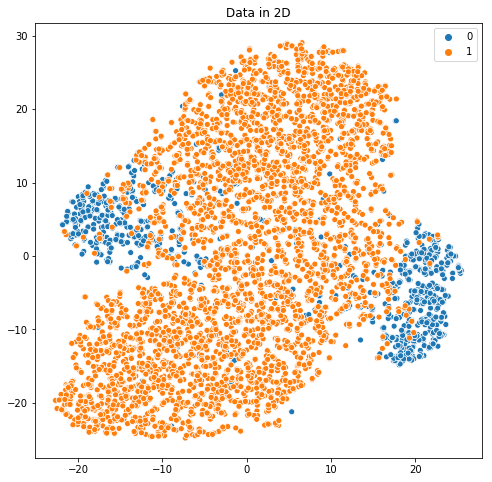

'\nresult1:svm,10%,{1: 4000, 0:1000}\nconfusion matrix:\n [[182  34]\n [  9 775]]\naccuracy: 0.957\nprecision: 0.957972805933251\nrecall: 0.9885204081632653\nfalsenegrate: 0\nf1 score:  0.973006905210295\n              precision    recall  f1-score   support\n\n           0       0.95      0.84      0.89       216\n           1       0.96      0.99      0.97       784\n\n   micro avg       0.96      0.96      0.96      1000\n   macro avg       0.96      0.92      0.93      1000\nweighted avg       0.96      0.96      0.96      1000\n\n'

In [50]:
# ClusterCentroids
sampler = ClusterCentroids(ratio={1: 4000, 0: 1000})
X_rs, y_rs = sampler.fit_sample(X, y)
print('Cluster centriods undersampling {}'.format(Counter(y_rs)))
visualize_2d(X_rs,y_rs)

'''
result1:svm,10%,{1: 4000, 0:1000}
confusion matrix:
 [[182  34]
 [  9 775]]
accuracy: 0.957
precision: 0.957972805933251
recall: 0.9885204081632653
falsenegrate: 0
f1 score:  0.973006905210295
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       216
           1       0.96      0.99      0.97       784

   micro avg       0.96      0.96      0.96      1000
   macro avg       0.96      0.92      0.93      1000
weighted avg       0.96      0.96      0.96      1000

'''

## (3) TomekLinks

in this method Given two instances a and b belonging to different classes and are separated by a distance d(a,b), the pair (a, b) is called a Tomek link if there is no instance c such that d(a,c) < d(a,b) or d(b,c) < d(a,b). Instances participating in Tomek links are either borderline or noise so both are removed.

TomekLinks undersampling Counter({1: 8886, 0: 956})


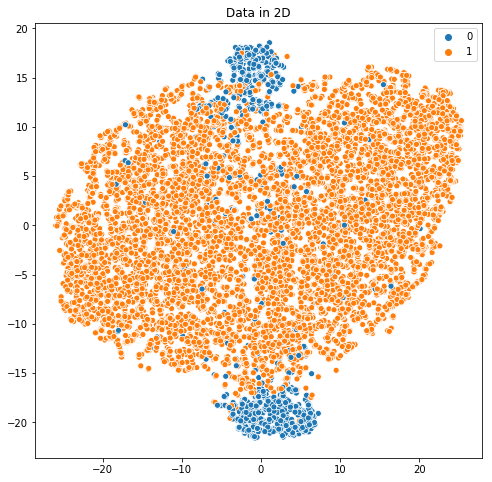

'\nresults:-{1: 1000, 0: 65}\nconfusion matrix:\n [[  0  44]\n [  0 354]]\naccuracy: 0.8894472361809045\nprecision: 0.8894472361809045\nrecall: 1.0\nfalsenegrate: 0\nf1 score:  0.9414893617021276\n\nresults:{1: 1700, 0: 265}(3k ds)\nconfusion matrix:\n [[ 45   3]\n [  1 544]]\naccuracy: 0.9932546374367622\nprecision: 0.9945155393053017\nrecall: 0.998165137614679\nfalsenegrate: 0\nf1 score:  0.9963369963369965\n'

In [40]:
# TomekLinks
sampler = TomekLinks(ratio={1: 4000, 0: 1000},random_state=0)
X_rs, y_rs = sampler.fit_sample(X, y)
print('TomekLinks undersampling {}'.format(Counter(y_rs)))
visualize_2d(X_rs,y_rs)

'''
result1:svm,10%,{1: 4000, 0:1000}
confusion matrix:
 [[ 166   22]
 [   3 1778]]
accuracy: 0.9873031995937024
precision: 0.9877777777777778
recall: 0.9983155530600786
f1 score:  0.9930187098575817
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       188
           1       0.99      1.00      0.99      1781

   micro avg       0.99      0.99      0.99      1969
   macro avg       0.99      0.94      0.96      1969
weighted avg       0.99      0.99      0.99      1969
'''

## (4) NeighbourhoodCleaningRule

Neighborhood Cleaning Rule (NCL) deals with the majority and minority samples separately when sampling the data sets. NCL uses ENN to remove majority examples.Edited Nearest Neighbor Rule (ENN) to remove any instance whose class label is different from the class of at least two of its three nearest neighbors. The idea behind this technique is to remove the instances from the majority class that is near or around the borderline of different classes

NearestNeighbours Clearning Rule undersampling Counter({1: 2558, 0: 174})


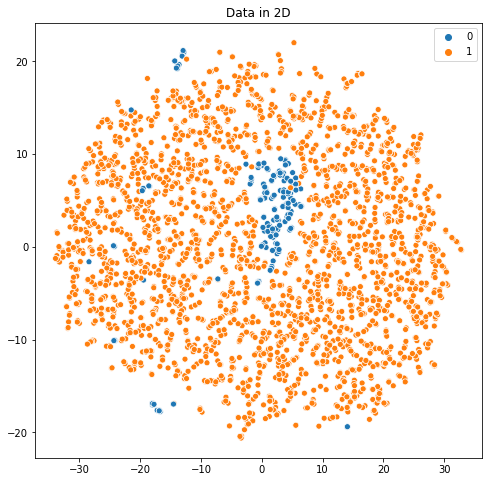

'\nresults:-{1: 1000, 0: 65}\nconfusion matrix:\n [[  0  31]\n [  0 350]]\naccuracy: 0.9186351706036745\nprecision: 0.9186351706036745\nrecall: 1.0\nfalsenegrate: 0\nf1 score:  0.957592339261286\n'

In [48]:
# NeighbourhoodCleaningRule
sampler = NeighbourhoodCleaningRule(ratio={1: 1700, 0: 265},random_state=0)
X_rs, y_rs = sampler.fit_sample(X, y)
print('NearestNeighbours Clearning Rule undersampling {}'.format(Counter(y_rs)))
visualize_2d(X_rs,y_rs)
'''
results:-{1: 1000, 0: 65}
confusion matrix:
 [[  0  31]
 [  0 350]]
accuracy: 0.9186351706036745
precision: 0.9186351706036745
recall: 1.0
falsenegrate: 0
f1 score:  0.957592339261286

results2:{1: 1700, 0: 265}
confusion matrix:
 [[ 30   1]
 [  1 515]]
accuracy: 0.9963436928702011
precision: 0.998062015503876
recall: 0.998062015503876
falsenegrate: 0
f1 score:  0.998062015503876
'''

## (5) NearMiss

The basic algorithms of the near neighbor family are this: first, the method calculates the distances between all instances of the majority class and the instances of the minority class. Then k instances of the majority class that have the smallest distances to those in the minority class are selected. If there are n instances in the minority class, the “nearest” method will result in k*n instances of the majority class.

NearMissCounter({1: 1700, 0: 265})


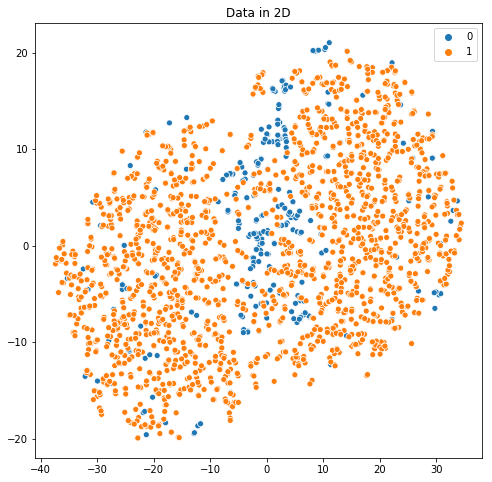

'\nresults:{1: 1000, 0: 65}\nconfusion matrix:\n [[  0  15]\n [  0 198]]\naccuracy: 0.9295774647887324\nprecision: 0.9295774647887324\nrecall: 1.0\nfalsenegrate: 0\nf1 score:  0.9635036496350364\n\nresult2:{1: 1700, 0: 265}\nconfusion matrix:\n [[ 50   4]\n [  6 333]]\naccuracy: 0.9745547073791349\nprecision: 0.9881305637982196\nrecall: 0.9823008849557522\nfalsenegrate: 0\nf1 score:  0.9852071005917159\n\n'

In [56]:
# NearMiss
sampler = NearMiss(ratio={1: 1700, 0: 265},random_state=0)
X_rs, y_rs = sampler.fit_sample(X, y)
print('NearMiss{}'.format(Counter(y_rs)))
visualize_2d(X_rs,y_rs)
'''
results:{1: 1000, 0: 65}
confusion matrix:
 [[  0  15]
 [  0 198]]
accuracy: 0.9295774647887324
precision: 0.9295774647887324
recall: 1.0
falsenegrate: 0
f1 score:  0.9635036496350364

result2:{1: 1700, 0: 265}
confusion matrix:
 [[ 50   4]
 [  6 333]]
accuracy: 0.9745547073791349
precision: 0.9881305637982196
recall: 0.9823008849557522
falsenegrate: 0
f1 score:  0.9852071005917159

'''

## different over-sampling techniques:
Oversampling increases the weight of the minority class by replicating the minority class examples. Although it does not increase information, it raises the over-fitting issue, which causes the model to be too specific. It may well be the case that the accuracy for the training set is high, yet the performance for new datasets is actually worse

### (1) Random oversampling for the minority class

Random oversampling simply replicates randomly the minority class examples. Random oversampling is known to increase the likelihood of occurring overfitting.the major drawback of Random undersampling is that this method can discard useful data.

C:\anaconda-installation\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning:

After over-sampling, the number of samples (2727) in class 1 will be larger than the number of samples in the majority class (class #1 -> 2723)



RandomOverSampler Counter({1: 2727, 0: 450})


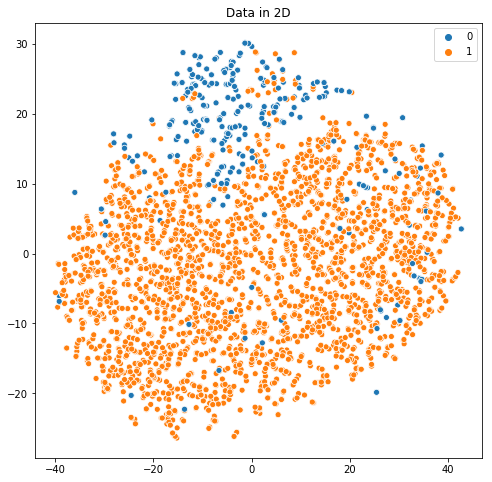

'\nresults:{1: 1927, 0: 300}\nconfusion matrix:\n [[  5  51]\n [  0 390]]\naccuracy: 0.8856502242152466\nprecision: 0.8843537414965986\nrecall: 1.0\nfalsenegrate: 0\nf1 score:  0.9386281588447652\n\nresult2:{1: 2727, 0: 450}(14%)\nconfusion matrix:\n [[ 87   4]\n [ 12 533]]\naccuracy: 0.9748427672955975\nprecision: 0.9925512104283054\nrecall: 0.9779816513761468\nfalsenegrate: 0\nf1 score:  0.9852125693160814\n'

In [42]:
# RandomOverSampler
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

# With over-sampling methods, the number of samples in a class
# should be greater or equal to the original number of samples.
sampler = RandomOverSampler(ratio={1: 2727, 0: 450},random_state=0)#0:27%
X_rs, y_rs = sampler.fit_sample(X, y)
print('RandomOverSampler {}'.format(Counter(y_rs)))
visualize_2d(X_rs,y_rs)
'''
results:{1: 1927, 0: 300}
confusion matrix:
 [[  5  51]
 [  0 390]]
accuracy: 0.8856502242152466
precision: 0.8843537414965986
recall: 1.0
falsenegrate: 0
f1 score:  0.9386281588447652

result2:{1: 2727, 0: 450}(14%)
confusion matrix:
 [[ 87   4]
 [ 12 533]]
accuracy: 0.9748427672955975
precision: 0.9925512104283054
recall: 0.9779816513761468
falsenegrate: 0
f1 score:  0.9852125693160814
'''

## (2) Synthetic Minority Oversampling Technique (SMOTE)
This method generates synthetic data based on the feature space similarities between existing minority instances. In order to create a synthetic instance, it finds the K-nearest neighbors of each minority instance, randomly selects one of them, and then calculate linear interpolations to produce a new minority instance in the neighborhood.(Synthetic Data Generation)

C:\anaconda-installation\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning:

After over-sampling, the number of samples (2727) in class 1 will be larger than the number of samples in the majority class (class #1 -> 2723)



SMOTE Counter({1: 2727, 0: 450})


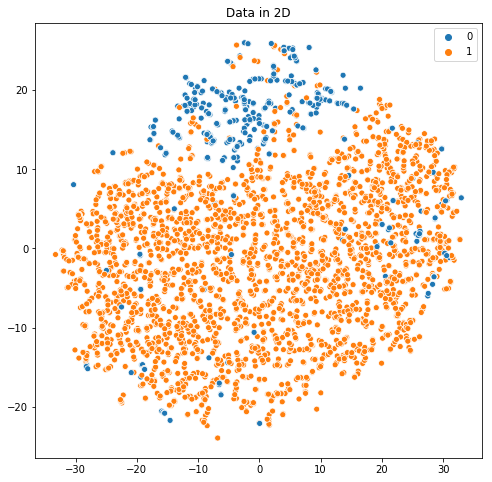

'\nconfusion matrix:\n [[ 11  45]\n [  0 390]]\naccuracy: 0.899103139013453\nprecision: 0.896551724137931\nrecall: 1.0\nfalsenegrate: 0\nf1 score:  0.9454545454545454\n\nresults:{1: 2727, 0: 450}\nconfusion matrix:\n [[ 87   4]\n [ 12 533]]\naccuracy: 0.9748427672955975\nprecision: 0.9925512104283054\nrecall: 0.9779816513761468\nfalsenegrate: 0\nf1 score:  0.9852125693160814\n'

In [29]:
sampler = SMOTE(ratio={1: 2727, 0: 450},random_state=1)
X_rs, y_rs = sampler.fit_sample(X, y)
print('SMOTE {}'.format(Counter(y_rs)))
visualize_2d(X_rs,y_rs)
'''
confusion matrix:
 [[ 11  45]
 [  0 390]]
accuracy: 0.899103139013453
precision: 0.896551724137931
recall: 1.0
falsenegrate: 0
f1 score:  0.9454545454545454

results:{1: 2727, 0: 450}
confusion matrix:
 [[ 88   3]
 [ 11 534]]
accuracy: 0.9779874213836478
precision: 0.994413407821229
recall: 0.9798165137614679
falsenegrate: 0
f1 score:  0.9870609981515711
'''

## (3) ADASYN: Adaptive Synthetic Sampling

ADASYN generates samples of the minority class according to their density distributions. More synthetic data is generated for minority class samples that are harder to learn, compared to those minority samples that are easier to learn. It calculates the K-nearest neighbors of each minority instance, then gets the class ratio of the minority and majority instances to generate new samples.

In [40]:
# ADASYN
sampler = ADASYN(ratio={1: 2727, 0: 650},random_state=1)
X_rs, y_rs = sampler.fit_sample(X, y)
print('ADASYN {}'.format(Counter(y_rs)))
visualize_2d(X_rs,y_rs)
'''
results:
confusion matrix:
 [[  0  53]
 [  0 382]]
accuracy: 0.8781609195402299
precision: 0.8781609195402299
recall: 1.0
falsenegrate: 0
f1 score:  0.9351285189718482
'''

C:\anaconda-installation\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning:

After over-sampling, the number of samples (2727) in class 1 will be larger than the number of samples in the majority class (class #1 -> 2723)



ValueError: No samples will be generated with the provided ratio settings.

## evaluating model's with confusion matrix

In [105]:
#evaluating model with confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
#test_calc.rename(columns={0: 'predicted'}, inplace=True)

df_table = confusion_matrix(y_test,y_pred)
print ('confusion matrix:\n',df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))
print(classification_report(y_test,y_pred))

confusion matrix:
 [[193  23]
 [ 14 770]]
accuracy: 0.963
precision: 0.9709962168978562
recall: 0.9821428571428571
f1 score:  0.9765377298668356
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       216
           1       0.97      0.98      0.98       784

   micro avg       0.96      0.96      0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000

